# **Numpy**

Numpy arrays unlike python lists can only contain data of the same type. If the type doesn't match Numpy will upcast them accordint to it's promotion rules.


In [1]:
import numpy as np
print(np.zeros(10,dtype=int))                  # Creates an array containing only zeros
print(np.ones((3,5),dtype=float))              # Creates an array containing onle ones
print(np.full((3,5),3.14))                     # Creates an array containing only 3.14(can be changed as per requirement)
print(np.arange(0,20,2))                       # Creates an array filled with linear sequence starting from 0 till 20 at the gap of two each [0,20)
print(np.linspace(0,1,5))                      # Creates an array filled with 5 values between [0,1)
print(np.random.random((3,3)))                 # Creates an array filled with random numbers between 0 and 1
print(np.random.normal(0,1,(3,3)))             # Creates an array of normally distributed random numbers with mean 0 and standard deviation 1
print(np.random.randint(0,10,(3,3)))           # Creates an array filled with random values between [0,10) 
print(np.eye(3))                               # Creates an identity matrix of dim 
print(np.empty(3))                             # Creates an empty array of size 

[0 0 0 0 0 0 0 0 0 0]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]
 [3.14 3.14 3.14 3.14 3.14]]
[ 0  2  4  6  8 10 12 14 16 18]
[0.   0.25 0.5  0.75 1.  ]
[[0.89863033 0.20158765 0.64807158]
 [0.13614515 0.56429265 0.87047427]
 [0.46797844 0.39477221 0.43278696]]
[[ 6.78576068e-01 -4.04150431e-01 -3.38733049e-01]
 [-1.47002670e+00 -7.56014335e-01 -7.15054792e-01]
 [ 4.14309841e-01 -9.25183490e-02 -8.27775900e-04]]
[[2 3 1]
 [8 1 3]
 [5 8 6]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[1. 1. 1.]


## **Basics of Numpy Array**
### **Numpy Array Attributes**
1) ndim        : number of dimensions
2) shape       : the size of each dimension
3) size        : total size of the array
4) dtype       : data type of each element

In [3]:
rng = np.random.default_rng(seed=1701)

x1 = rng.integers(10,size=6)
x2 = rng.integers(10,size=(3,4))
x3 = rng.integers(10,size=(3,4,5))

print("ndim: ",x2.ndim)
print("shape: ",x2.shape)
print("size: ",x2.size)
print("dtype: ",x2.dtype)

ndim:  2
shape:  (3, 4)
size:  12
dtype:  int64


### **Array Indexing**

In [4]:
print(x1)               
print(x1[0])                # Array indexing starts from 0 not 1
print(x1[-1])               # Array can also be accessed using -ve indexes starting from the right
print(x2)
print(x2[1,1])              # For multidimensional arrays it requires user to input for each dimension
print(x2[-1,-1])

[9 4 0 3 8 6]
9
6
[[3 1 3 7]
 [4 0 2 3]
 [0 0 6 9]]
0
9


### **Array Slicing**
>x[start:stop:step]

start index is included

stop index is excluded

step is number of elements to skip

In [8]:
#One dimensional array 
print(x1)
print(x1[1:4])              # elements on [1,4)
print(x1[-4:-1])            # elements starting from -4 to -1
print(x1[1::2])             # every second element after 1st
print(x1[::-1])             # all elements are reversed

[9 4 0 3 8 6]
[4 0 3]
[0 3 8]
[4 3 6]
[6 8 3 0 4 9]


In [9]:
#Multidimensional arrays
print(x2)
print(x2[2,:])              # every element in 3rd row
print(x2[:,1])              # every element in 2nd column
print(x2[0])                # every element in 1st row, equivalent to x2[0,:]

[[3 1 3 7]
 [4 0 2 3]
 [0 0 6 9]]
[0 0 6 9]
[1 0 0]
[3 1 3 7]


Unlike python list slices the ones by Numpy are views not copies, i.e. in case of changes made to subarray it will be reflected in the actual array

In [10]:
x2_sub = x2[:2,:2]
print(x2)
print(x2_sub)
x2_sub[0,0] = 100
print(x2)
print(x2_sub)

[[3 1 3 7]
 [4 0 2 3]
 [0 0 6 9]]
[[3 1]
 [4 0]]
[[100   1   3   7]
 [  4   0   2   3]
 [  0   0   6   9]]
[[100   1]
 [  4   0]]


To prevent this use .copy() function

### **Reshaping arrays**
Another useful function of numpy is .reshape() it allows one to reshape an array to another shape with the condition that the size of the arrays is same and it returns a no-copy view of the original array

In [13]:
x = np.array([1,2,3])
print(x)
print(x.reshape(3,1))           # convert to row vector
print(x.reshape(1,3))           # convert to column vector
print(x[np.newaxis,:])          # convert to row vector
print(x[:,np.newaxis])          # convert to column vector

[1 2 3]
[[1]
 [2]
 [3]]
[[1 2 3]]
[[1 2 3]]
[[1]
 [2]
 [3]]


### **Array Concatenation and Splitting**
>Concatenation

In [16]:
x = np.array([1,2,3])
y = np.array([3,2,1])
print(x,y)
print(np.concatenate([x,y]))
z = np.array([99,99])
print(np.concatenate([x,y,z]))
grid = np.array([[1,2,3],
                 [4,5,6]])
print(np.concatenate([grid,grid]))
print(np.concatenate([grid,grid],axis=1))               # axis=0, is along the columns and axis=1 is along the rows
print(np.vstack([x,grid]))
print(np.hstack([grid,z.reshape(2,1)]))


[1 2 3] [3 2 1]
[1 2 3 3 2 1]
[ 1  2  3  3  2  1 99 99]
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
[[1 2 3 1 2 3]
 [4 5 6 4 5 6]]
[[1 2 3]
 [1 2 3]
 [4 5 6]]
[[ 1  2  3 99]
 [ 4  5  6 99]]


>Splitting

In [19]:
x = [1,2,3,4,9,9,7]
x1,x2,x3 = np.split(x,[3,5])                 #Splits the x array at the indices 3 and 5(before them)
print(x1,x2,x3)
grid = np.arange(16).reshape((4,4))
print(grid)
upper, lower = np.vsplit(grid,[2])           # Splits the array along the row divides a vertical line into two
print(upper,lower)
left,right = np.hsplit(grid,[2])             # Splits the array along the col divieds a horizontal line into two
print(left,right)

[1 2 3] [4 9] [9 7]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1 2 3]
 [4 5 6 7]] [[ 8  9 10 11]
 [12 13 14 15]]
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]] [[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


## **Ufuncs**
Python functions are slow, to overcome them numpy has vectorized functions also known as ufuncs which are faster in comparsion

## **Numpy's Ufuncs**

> Array Arithmetic

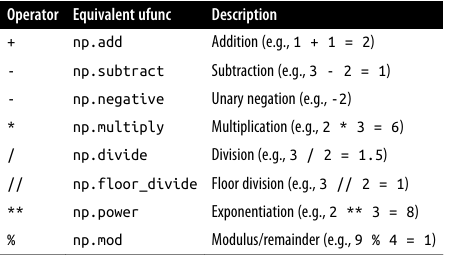

>Absolute Value

np.abs() or np.absolute() returns the absolute value in case of complex data it returns the magnitude(ignoring the imaginary value)

>Trignometric Functions

np.sin()            x           np.arcssin()

np.cos()            x           np.arccos()

np.tan()            x           np.arctan()

other than above numpy has a large number of ufuncs for trignometric functions

>Exponents and Logarithms

np.ex(x)            -e^x

np.exp2(x)          -2^x

np.power(3,x)       -3^x

np.log(x)           -ln(x)

np.log2(x)          -log2(x)

np.log10(x)         -log10(x)

other than the above has some ufuncs which are useful for maintaing precision for very small values

np.expm1(x)         -e^x - 1

np.log1p(x)         -log(1+x)

>Specialized Ufuncs

Above are the some of the commonly used Ufuncs other than that there are exponentially more ufuncs which can be seen in the Numpy Documentation, so try looking into it before trying to define yourself, it'll be faster and save some brain cells



### **Advanced Ufunc Features**

>Specifying Output

Numpy ufuncs have a parameter *out* which takes another np.array() as an input and stores the output to it instead, but be carefuel !!!! it is required that the shape of the array matches the shape of the output


In [27]:
x = np.empty(5, dtype="float64")  
y = np.empty(5, dtype="float64")  
np.multiply(x, 10, out=y)         
print(y)

[ 0. 10. 20. 30. 40.]


>Aggregrations

Used to reduce an array with a particular operation, we can use *reduce*

In [28]:
x = np.arange(1,6)
print(np.add.reduce(x))
print(np.multiply.reduce(x))

15
120


*accumulate* instead of reducing the array to a single output stores the operations per indice

In [29]:
print(x)
print(np.add.accumulate(x))
print(np.multiply.accumulate(x))

[1 2 3 4 5]
[ 1  3  6 10 15]
[  1   2   6  24 120]


>Outer Products

Sometimes it is required to get output for the operation on all possible pair, for that we can use the *outer* method

In [33]:
x = np.arange(1,6)
print(x)
print(np.add.outer(x,x))
print(np.multiply.outer(x,x))

[1 2 3 4 5]
[[ 2  3  4  5  6]
 [ 3  4  5  6  7]
 [ 4  5  6  7  8]
 [ 5  6  7  8  9]
 [ 6  7  8  9 10]]
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


## **Aggregrations**
We covered two aggregrations *accumulate* and *reduce* now there are a few more

*sum* is equivalent to np.add.reduce()

In [34]:
rng = np.random.default_rng()
L = rng.random(10)
print(L)
print(np.sum(L))

[0.81178698 0.56426369 0.89838684 0.36675321 0.92854734 0.46324914
 0.03410081 0.29296958 0.60185115 0.4225856 ]
5.384494344262657


*min* and *max* as return the min and max values form the array

In [35]:
print(np.min(L)," ",np.max(L))

0.03410081032873069   0.9285473352657306


The same aggregrate ufuncs also work for multidimensional arrays plus they have some additional functionalites such as finding out the sum,min,max rowwise, columnwise as well

In [36]:
M = rng.integers(0,10,(3,4))
print(M)
print(np.sum(M))                    # Sum of all values in array
print(np.min(M))                    # Smallest value in array
print(np.min(M,axis=0))             # Smallest value per column
print(np.min(M,axis=1))             # Smallest value per row

[[0 9 1 2]
 [7 8 4 4]
 [1 2 9 2]]
49
0
[0 2 1 2]
[0 4 1]


### **Other Aggregration Functions**

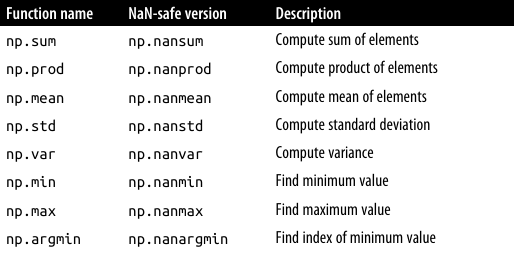

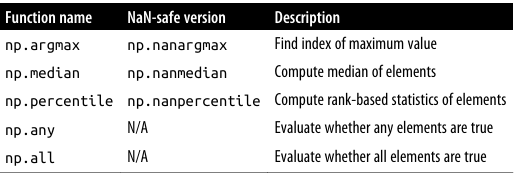

## **Broadcasting**
a set of rules by which NumPy let's you apply binary functions between array of different sizes and shapes

In [37]:
a = np.array([0,1,2])
b = np.array([5,5,5])
print(a,b)
print(a+b)
print(a+5)

[0 1 2] [5 5 5]
[5 6 7]
[5 6 7]


above we see even when we add an array of 5 versus a single 5 the result are the same

In [39]:
M = np.ones((3,3))
print(M)
print(M+1)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


Oh, it also works for multidimensional arrays, now what about two arrays of different shapes?

In [41]:
b = a.reshape((3,1))
print(a,b)
print(a+b)

[0 1 2] [[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


a (3,1) and (1,3) array can also perform binary functions

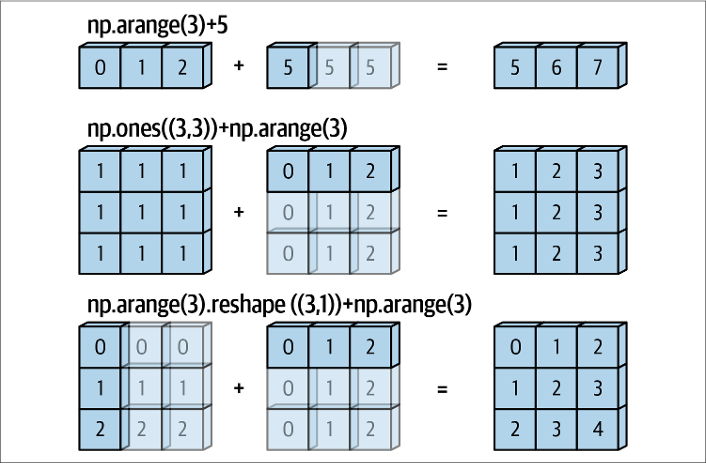

>Rule 1: If two arrays differ in their number of dimension, the shape of the one with fewer dimensions is padded with the ones on ints leading(left) side

>Rule 2: If the shape of the arrays doen't match in any dimension the array with the shape equal to 1 in that dimension is stretched to match the other shape

>Rule 3: If in any dimesnion the sizes disagree neither is equal to 1, an error is raised


In [44]:
M = np.ones((2,3))
a = np.arange(3)
print(M)
print(a)
print(M.shape)
print(a.shape)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]
(2, 3)
(3,)


M has the shape (2,3) and a has the shape (3,) so?

According to rule pad the array with 1 on its left side and it becomes (1,3), now according to rule we stretch it to (2,3) so we expect the output to be: 

1 2 3

1 2 3

In [45]:
print(M+a)

[[1. 2. 3.]
 [1. 2. 3.]]


In [46]:
a = np.arange(3).reshape(3,1)
b = np.arange(3)
print(a)
print(b)
print(a.shape)
print(b.shape)

[[0]
 [1]
 [2]]
[0 1 2]
(3, 1)
(3,)


Now we work with two arrays one of shape (3,1) and (3,) we pad the array b on the left getting the shape (1,3), stretching both in the dimension with value 1 we should end up 
with:

0 1 2

1 2 3

2 3 4

In [47]:
print(a+b)

[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [48]:
M = np.ones((3,2))
a = np.arange(3)
print(M)
print(a)
print(M.shape)
print(a.shape)

[[1. 1.]
 [1. 1.]
 [1. 1.]]
[0 1 2]
(3, 2)
(3,)


This is a difficult one, let's follow rule 1 and pad array a to (1,3) according to rule we should stretch the dimension with value 1 but M has dimension (3,2) which cannot be stretched so according to rule 3, it cannot be broadcast

In [49]:
print(M+a)

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

Is it possible to solve the above error?

In [50]:
print(M.reshape(2,3)+a)

[[1. 2. 3.]
 [1. 2. 3.]]


## **Comparisons, Masks and Boolean Logic**



Masking is used when you want to extract, modify, count or otherwise manipulate values in an array based on some criterion: for example, you might wish to count all values greater than a certain value, or remove all outliers that are above some threshold and boolean masking is often the most efficient way to accomplish these types of tasks

In [51]:
x = np.array([1,2,3,4,5])
print(x<3)
print(x>3)
print(x<=3)
print(x>=3)
print(x!=3)
print(x==3)

[ True  True False False False]
[False False False  True  True]
[ True  True  True False False]
[False False  True  True  True]
[ True  True False  True  True]
[False False  True False False]


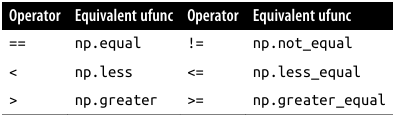

Working with boolean arrays

In [52]:
x = rng.integers(10,size=(3,4))
print(x)
#how many values less than 6?
print(np.count_nonzero(x<6))
#how many values less than 6 in each row?
print(np.sum(x<6,axis=1))
#are there values greater than 8?
print(np.any(x>8))
#similarly we can compare equal to , less than etc. in the whole array, each row or each column

[[2 8 6 8]
 [9 5 7 0]
 [8 8 5 0]]
5
[1 2 2]
True


Boolean Operators

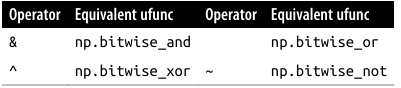

Boolean Arrays as Masks: this is an important technique it allow us to use the boolean array we get after a condition

In [56]:
print(x)
print([x<5])
print(x[x<5])

[[2 8 6 8]
 [9 5 7 0]
 [8 8 5 0]]
[array([[ True, False, False, False],
       [False, False, False,  True],
       [False, False, False,  True]])]
[2 0 0]


In [57]:
print([x>5])
print(x[x>5])

[array([[False,  True,  True,  True],
       [ True, False,  True, False],
       [ True,  True, False, False]])]
[8 6 8 9 7 8 8]


As it can be seen, it prints all the indices where the condition is True

## **Fancy Indexing**
it means passing an array of indices to access multiply array elements at once

In [59]:
x = rng.integers(100,size=(10))
print(x)

[99 20 60 87 94 30 79 42  0 55]


Either we can use:

In [60]:
print(x[2],x[3],x[7])

60 87 42


or use fancy indexing

In [61]:
ind = [2,3,7]
print(x[ind])

[60 87 42]


when using array of indices the shape of the result reflects the shape of the index arrays rather than the shape of array being indexed

In [62]:
ind = np.array([[3,7],
                [4,5]])
print(x[ind])

[[87 42]
 [94 30]]


instead of printing 87 42 94 30 it prints it in the shape of ind

>Combined indexing

Rather than using only traditional indexing or slicing we can combine it with fancy indexing

In [65]:
X = rng.integers(12,size=(3,4))
print(X)

[[ 0  3  4  3]
 [ 8  6  1  5]
 [ 1 10  4 10]]


In [66]:
print(X[2,[2,0,1]])

[ 4  1 10]


In [67]:
print(X[1:,[2,0,1]])

[[ 1  8  6]
 [ 4  1 10]]


Modifying values with Fancy Indexing

In [68]:
x = np.arange(10)
print(x)
i = np.array([2,1,8,4])
x[i]=99
print(x)
x[i]-=10
print(x)


[0 1 2 3 4 5 6 7 8 9]
[ 0 99 99  3 99  5  6  7 99  9]
[ 0 89 89  3 89  5  6  7 89  9]


In [70]:
x = np.zeros(10)
print(x)
x[[0,0]]=[4,6]  
print(x)                        #x[0] is first replaced by 4 then 6
i = [2,3,3,4,4,4]
x[i]+=1
print(x)                        #the addition function is repeated at the indices 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[6. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


One might expect the result to be [6,0,1,2,3,0,0,0,0,0] but x[i] = x[i]+1, this is assignment not augmentation of multiple times

In [72]:
x = np.zeros(10)
np.add.at(x,i,1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## **Sorting Arrays**
sorted(L) returns a copy of sorted list

L.sort() sorts the list itself and doesn't return a list

the above are sorting methods provided by python and even work for strings as well

*np.sort(x)* is similart to *sorted(x)*

*x.sort()* is similar to *x.sort()*

*np.argsort()* instead returns of the sorted elements 

In [73]:
x =  np.array([2,5,4,8,6,1,3])
print(np.sort(x))                   # returns a copy
print(x)
print(x.sort())                     # sorts in place
print(x)


[1 2 3 4 5 6 8]
[2 5 4 8 6 1 3]
None
[1 2 3 4 5 6 8]


In [74]:
x =  np.array([2,5,4,8,6,1,3])
i = np.argsort(x)
print(i)

[5 0 6 2 1 4 3]


Sorting can also be done along the row or along the columns by just setting axis

In [79]:
X = rng.integers(0,10,(4,6))
print(X)
print(np.sort(X,axis=0))            # sorts the columns
print(np.sort(X,axis=1))            # sorts the rows

[[3 2 3 0 2 6]
 [3 5 4 1 3 9]
 [5 8 8 2 1 0]
 [9 4 2 3 1 5]]
[[3 2 2 0 1 0]
 [3 4 3 1 1 5]
 [5 5 4 2 2 6]
 [9 8 8 3 3 9]]
[[0 2 2 3 3 6]
 [1 3 3 4 5 9]
 [0 1 2 5 8 8]
 [1 2 3 4 5 9]]


Remember it treats rows and columns as independent arrays so any relationship will be lost

### **Partitioning**
Sometimes instead of sorting the whole array we want to find the k smallest values for that we use *partition* function, it returns the array with k smallest values on the left in arbitary order and the rest of the numbers to the right also in arbitary order

In [82]:
x = np.random.randint(10,size=(10))
print(x)
print(np.partition(x,3))

[1 0 0 2 6 2 7 9 7 6]


In [83]:
X = np.random.randint(100,size=(4,4))
print(X)
np.partition(X,2,axis=1)        # Partitions the first 2 along the rows

[[73 40 47 23]
 [79 93 97 28]
 [82 42 77  7]
 [86 51 71 86]]


array([[23, 40, 47, 73],
       [28, 79, 93, 97],
       [ 7, 42, 77, 82],
       [51, 71, 86, 86]])